<h1 style="color:blue;text-align:center"> R Bootcamp - Part I </h1>

<h2 style="color:red;text-align:center"> Venki Uddameri, Ph.D. P.E.</h2>

#### <center> <h4>  Lesson 9 - R Programming - Looping Statements </h4> </center>

<hr style="height:4px;border-width:0;background-color:blue">

<h3 style="color:purple">  Loops in R </h3>

Loops are used in two case:
* When a same set of calculations has to be carried out a fixed number of times.  For example, perform a calculation on all elements of a vector.
* When a set of calculations are to be carried out till some condition is met.  Such a situation commonly occurs when finding roots of an equation or solving equations iteratively.

The <font color='blue'> <b> FOR LOOP </b> </font> is commonly used when the number of iterations are fixed (or known a priori).  The <font color='blue'> <b> WHILE LOOP </b> </font> is typically used when the number of iterations is not known a priori.  

<font color='red'> In R the code runs sequentially.  Loops essentially help perform calculations that require one to go back and forth within a script.  </font>

<h3 style="color:purple"> FOR Loop </h3>

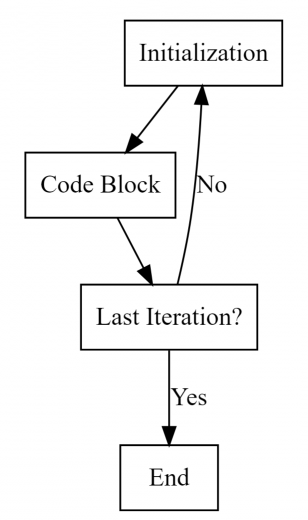


The for loop in R can be implemented in a straightforward manner.  Let us see how this is done using an example.

For Loop Example:

Compute the square root of the following numbers a = [1,3,4,5,63,5,6,4,3,5] using a for loop.


In [1]:
# Loop through vector a and compute the sqrt of each element.
a <- c(1,3,4,5,63,5,6,4,3,5)  # Vector over which the calculations have to be performed
b <- c()  # initialize a vector to store the data

for (i in seq(1,length(a),1))  # Setup for loop to iterate sequentially over the index of vector a
{                              # Use { to being the code block
    b[i] <- round(sqrt(a[i]),3)         # compute square root and round to 3 decimals
}                              # use } to close the for loop code block
print(b)  # print the results once the loop is complete

 [1] 1.000 1.732 2.000 2.236 7.937 2.236 2.449 2.000 1.732 2.236


<h3 style="color:purple"> WHILE Loop </h3>

An if statement is used to perform a certain type of actions if a certain condition is met other wise the program proceeds normally.  


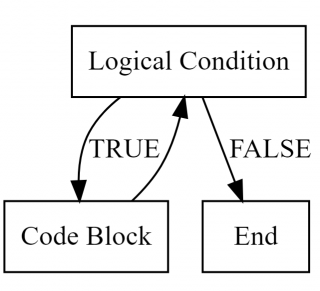

<p> Example of a While loop: <br>
Find the root of $x^3-4x$ in the range [1,5] using Newton-Raphson Method </p>

<p> According to Newton Raphson method the new estimate of the root of a function f(x) is given as: <br>
    $ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $ <br>
    which in our case leads to: <br>
    $ x_{n+1} = x_n - \frac{x^3-4x}{3x^2-4)} $ <br>

   Analytically $f(x) = x(x^2-4)$ so $x=0,x=2, x=-2$ are the roots

In [2]:
# find the root of y <- x^3 - 4x for x using newtwon raphson method in bounds [1,5] 
# Note for x^3 - 4x can be written as x(x^2-4) implies the roots are x=0,x=2,x=-2
# Newton Raphson method says x(t+1) = x - f(x)/f'(x) can be used to estimate the root
# f(x) = x^3 - 4x and f'(x) = 3x^2 - 4

x <- 1.5  # start with an initial guess (Initial guess will control which root will be found)
err <- 10000 # start with a large error
tol <- 1E-05  # tolerance for the solution
while(err>tol)
    {
    fx <- x^3 - 4*x
    dfx <- 3*x^2 - 4
    xnew <- x - (fx/dfx)
    err <- abs(xnew-x)
    x <- xnew
}
print(x)

[1] 2


<font color='red'> Both for loop and the while loop can be nested (i.e., can have for loops within for loops and while loops within while loops)  A nested for loop is used to create and manipulate two dimensional matrices. <font color='red'> 

<h3 style="color:purple"> BREAK Statement </h3>

A <b> break statement </b> can be used to exit a for loop or a while loop.  Such a situation may arise when it say the computations start to diverge and cause overflow errors (i.e., creation of numbers so large that the computer cannot handle).  In addition, R also offers another looping mechanism call repeat that explicitly makes use of the break statement.  Let us first look at the use of break statement with a for loop.

Break statement Example:

Compute the square root of numbers less than 5 in the following vector a - [1,3,4,5,63,5,6,4,3,5] using a for loop.

One approach is to sort the vector and break out of the for loop when the number is equal to 5.

In [3]:
a <- c(1,3,4,5,63,5,6,4,3,5) 
a.sort <- sort(a)
b <- c()
for(i in seq(1,length(a.sort),1))
    {
    if(a.sort[i]>=5){
        break
    }else{
        b[i] <- round(sqrt(a.sort[i]),3)
    }
}
print(b)

[1] 1.000 1.732 1.732 2.000 2.000


<h3 style="color:purple"> NEXT Statement </h3>

The <b> next </b> statement is closely related to the break statement.  Next is used when we want to skip calculations during certain iterations within a for or a while loop.  Let us solve the above example now using the next statement 

In [4]:
a <- c(1,3,4,5,63,5,6,4,3,5) 
b <- c()
idx <- 1
for(i in seq(1,length(a),1))
    {
    if(a[i] >= 5){
        next
    } else{
        b[idx] <- round(sqrt(a[i]),3)
        idx <- idx + 1
    }
}
print(b)

[1] 1.000 1.732 2.000 2.000 1.732


Note in this approach the numbers in the vectors are not sorted as was the case before.

<h3 style="color:purple"> REPEAT Statement </h3>

A <b> <font color='blue'> repeat statement </font> </b> allows you to repeat a set of instructions (a code block) until the conditions to break out of the loop are encountered.    

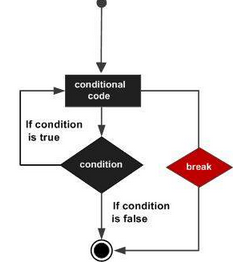

<font color='blue'>  A repeat statement is similar to a while statement except it invokes a slightly different syntax </font>  As such, it is not as widely used in R as the while loop.  

In [6]:
a <- c(1,3,4,5,63,5,6,4,3,5) 
b <- c()
idx <- 1
repeat{
    b[idx] <- round(sqrt(a[idx]),3)
    idx <- idx + 1
    
    if(idx > length(a))
        {
        break      
       }
}

print(b)


 [1] 1.000 1.732 2.000 2.236 7.937 2.236 2.449 2.000 1.732 2.236


<h3 style="color:purple">Nesting FOR Loops </h3>

Nesting of for loops is useful when performing matrix manipulations.  Although R provides better functions to do many matrix calculations such as finding inverse, matrix multiplication and such.  Let use look at a similar example as we saw before.

<font color='blue'> Nested For Loop Example: </font>

Read the matrix provided to you (matrixexample.csv) and take the square-root for each element.  Write the output matrix.  

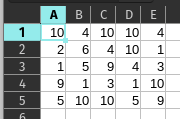

In [12]:
# Read the matrix from the csv
a <- read.csv('matrixexample.csv',header=F)  # read the matrix without a header
a <- as.matrix(a)  # convert from a data.frame to a matrix class
print("The a matrix is:")  # Print the original matrix
print(a)
NX <- ncol(a)  # get number of rows of the matrix
NY <- nrow(a)  # get the number of columns of the matrix
b <- mat.or.vec(NY,NX)  # Create a matrix with rows and columns
for(i in seq(1,NY,1))  # loop through the columns
    {
    for(j in seq(1,NX,1))  # loop through each row
        {
        b[j,i] <- round(sqrt(a[j,i]),3)  # compute the square root of each element of the matrix
    }
}
print("The b matrix is:")
print(b) # print the square root matrix

[1] "The a matrix is:"
     V1 V2 V3 V4 V5
[1,] 10  4 10 10  4
[2,]  2  6  4 10  1
[3,]  1  5  9  4  3
[4,]  9  1  3  1 10
[5,]  5 10 10  5  9
[1] "The b matrix is:"
      [,1]  [,2]  [,3]  [,4]  [,5]
[1,] 3.162 2.000 3.162 3.162 2.000
[2,] 1.414 2.449 2.000 3.162 1.000
[3,] 1.000 2.236 3.000 2.000 1.732
[4,] 3.000 1.000 1.732 1.000 3.162
[5,] 2.236 3.162 3.162 2.236 3.000


<h3 style="color:purple"> Summary</h3>

In this notebook we looked at common looping techniques in R.  The <b> for, while and repeat </b> are available in R to loop over a set of values. While these loops can be used in any context, for loops are most commonly used for looping over a finite set of values, and the while loop is used to loop when the number of iterations are not known a priori.  The repeat statment is similar to the while loop.  The <b> break and next statements </b> are useful to exit the loop or skip iterations.  Loops in conjunction with conditional statements are powerful tool to enhance the built in functionality of R.  